In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [2]:
data = pd.read_csv("data/pokupki.csv")
data = data.drop(columns=['Дата оформления заказа', 'Код сотрудника'])

In [3]:
data.dropna(inplace=True)

In [4]:
def prepare_for_clustering(df):
    """
    Преобразует DataFrame для кластеризации, обрабатывая:
    - Числовые признаки: стандартизация
    - Категориальные признаки: One-Hot Encoding
    """
    # Разделение признаков по типам
    numeric_features = df.select_dtypes(include=['number']).columns
    categorical_features = df.select_dtypes(exclude=['number']).columns

    # Создание преобразователя с актуальным параметром sparse_output
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numeric_features),
            ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features)
        ],
        remainder='drop'
    )

    # Применение преобразований
    processed_data = preprocessor.fit_transform(df)
    
    # Создание DataFrame с названиями признаков
    numeric_names = numeric_features.tolist()
    if len(categorical_features) > 0:
        ohe = preprocessor.named_transformers_['cat']
        categorical_names = ohe.get_feature_names_out(categorical_features)
        feature_names = numeric_names + categorical_names.tolist()
    else:
        feature_names = numeric_names

    return pd.DataFrame(processed_data, columns=feature_names)

In [5]:
pastprocess_data = prepare_for_clustering(data)

In [6]:
data

,Департамент,Наименование товара,Стоимость в валюте,Скидка,Количество,Категория,Статус товара,tovar
0,ДРП.HR-партнеры,Бобер-антистресс,250,0,1,Мерч и сувениры КРОК,закончился,Бобер-антистресс
1,Отдел дизайна,Олимпийка SOFT `24,0,100,1,В стиле КРОК,на витрине,Олимпийка SOFT `24
2,ДИРС.группа инженеров по инфраструктурному ПО,Бобер-антистресс,250,0,1,Мерч и сувениры КРОК,закончился,Бобер-антистресс
3,ДИМС.группа инженеров по мультимедийным системам,Футболка КРОК х Humanist,800,0,1,Мерч и сувениры КРОК,закупка,Футболка КРОК х Humanist
4,ДИРС.Информационная безопасность.группа инжене...,Толстовка HARD `24,1700,15,1,В стиле КРОК,на витрине,Толстовка HARD `24
...,...,...,...,...,...,...,...,...
28830,ДВА.центральная служба технической поддержки,"Термокружки ""CROC IT NOW"" на выбор",700,0,1,В стиле КРОК,закончился,"Термокружки ""CROC IT NOW"" на выбор"
28831,Отдел дизайна,Фикус,1500,0,1,Прокачай эффективность,закончился,Фикус
28832,Отдел дизайна,"Термокружки ""CROC IT NOW"" на выбор",700,0,1,В стиле КРОК,закончился,"Термокружки ""CROC IT NOW"" на выбор"
28833,Отдел дизайна,"Журнал ""Harvard Bisiness Review""",800,0,1,Сервис,закончился,"Журнал ""Harvard Bisiness Review"""


In [7]:
pastprocess_data

,Стоимость в валюте,Скидка,Количество,Департамент_Digital.Strategy Consulting,Департамент_Transformation office,Департамент_АЭД,Департамент_АЭД.АО,Департамент_АЭД.АО.курьеры,Департамент_АЭД.АО.секретариат,Департамент_АЭД.отдел по эксплуатации инженерных систем,...,tovar_Чемодан для путешествий КРОК серый,tovar_Черные командные кружки,tovar_Чехол для ноутбука,tovar_Чехол на пропуск Soft&Hard,tovar_Шапка Деда Мороза,tovar_Шапочка для плавания 1̶5̶0̶,tovar_Шарф,tovar_Шоппер КРОК FEST TOUR,tovar_Электрическая зубная щетка,tovar_Эспандер КРОК ̶2̶5̶0̶
0,-0.410847,-0.061175,-0.090995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.665779,22.522369,-0.090995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.410847,-0.061175,-0.090995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.150006,-0.061175,-0.090995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.067764,3.326357,-0.090995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28801,0.048033,-0.061175,-0.090995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28802,0.863818,-0.061175,-0.090995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28803,0.048033,-0.061175,-0.090995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28804,0.150006,-0.061175,-0.090995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
sns.heatmap(data.corr(), annot=True)
plt.show()

ValueError: could not convert string to float: 'ДРП.HR-партнеры'

In [31]:
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(pastprocess_data)

In [8]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(pastprocess_data)

In [ ]:
agg = AgglomerativeClustering(n_clusters=3)
labels = agg.fit_predict(pastprocess_data)

In [9]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pastprocess_data)
    inertia.append(kmeans.inertia_)

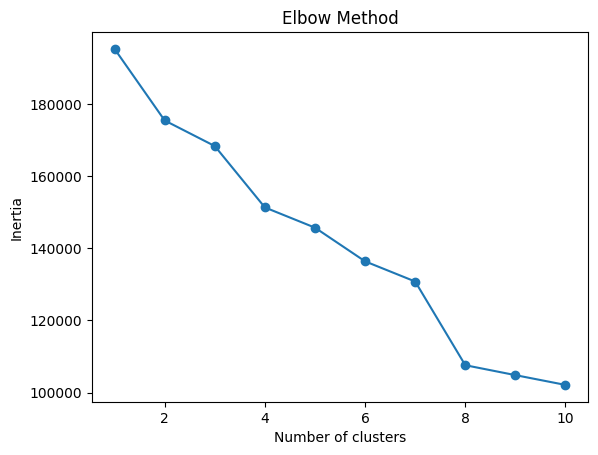

In [10]:
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [11]:
print("Silhouette Score:", silhouette_score(pastprocess_data, labels))
print("Davies-Bouldin Index:", davies_bouldin_score(pastprocess_data, labels))

Silhouette Score: 0.1236846877784694
Davies-Bouldin Index: 1.1547354838793114


In [12]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(pastprocess_data)

In [ ]:
# Или использование t-SNE
# tsne = TSNE(n_components=2, perplexity=30)
# reduced_data = tsne.fit_transform(scaled_data)

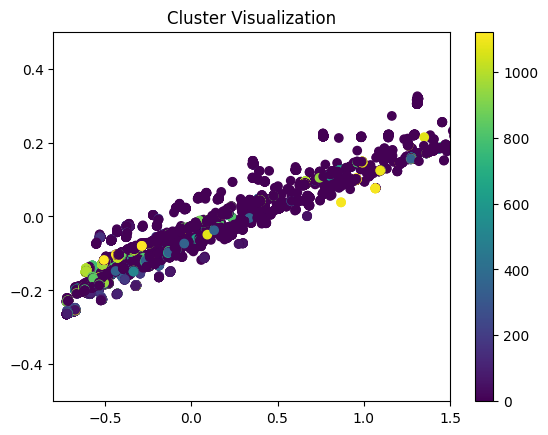

In [ ]:
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis')
plt.title('Cluster Visualization')
plt.colorbar()

plt.xlim(-0.8,1.5)
plt.ylim(-0.5,0.5)

plt.show()

In [16]:
data['cluster'] = labels
cluster_stats = data.groupby('cluster').mean()

TypeError: agg function failed [how->mean,dtype->object]

In [17]:
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_stats.T, annot=True, cmap='YlGnBu')
plt.title('Feature Means per Cluster')
plt.show()

NameError: name 'cluster_stats' is not defined

<Figure size 1200x600 with 0 Axes>